In [41]:
#importando las librerías necesarias

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

# Configuración matplotlib

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Importamos el dataset

dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:, :-1].values.reshape(-1,1)
y = dataset.iloc[:, -1].values.reshape(-1,1)

In [43]:
# Partiendo el dataset para entrenamiento y para testeo
# En este caso de dimos 1/3 de testeo, es importante dedicarle la mayor parte al entrenamiento

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0 )

In [44]:
# Entrenamos el modelo de Regresion Lineal Simple con el dataset de entrenamiento

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [45]:
# Información del modelo

print("Intercept:", regressor.intercept_)
print("Coeficiente:", list(zip('x', regressor.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", regressor.score(x, y))

Intercept: [26816.19224403]
Coeficiente: [('x', 9345.942443122374)]
Coeficiente de determinación R^2: 0.9565349708076958


In [46]:
#Error de test del modelo 

from sklearn.metrics import mean_squared_error

predicciones = regressor.predict(X = x_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[ 40835.10590871]
 [123079.39940819]
 [ 65134.55626083]]

El error (rmse) de test es: 4585.415720467589


In [47]:
# Usamos el modelo ya entrenado para predecir con las variables independientes del dataset de testeo

y_pred = regressor.predict(x_test)

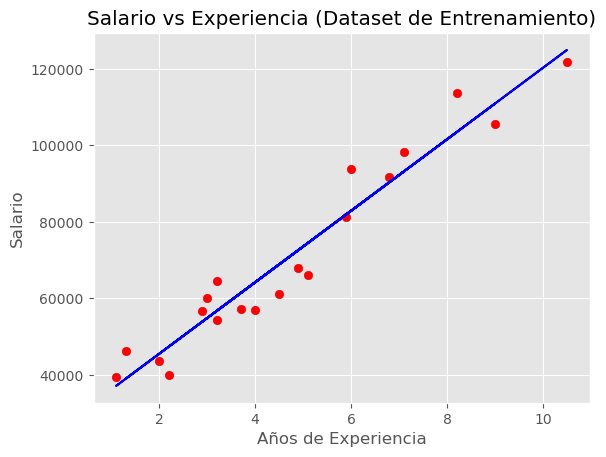

In [48]:
#Visualizamos una comparativa entre el modelo de regresion vs. el dataset de entrenamiento

plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salario vs Experiencia (Dataset de Entrenamiento)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.show()

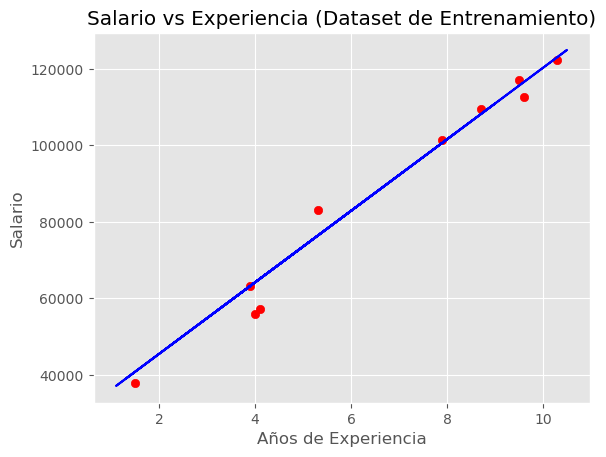

In [49]:
#Visualizamos una comparativa entre el modelo de regresion vs. el dataset de testeo

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salario vs Experiencia (Dataset de Entrenamiento)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.show()

In [50]:
# Lo que podemos ver de este modelo, es que refleja un comportamiento practicamente lineal la experiencia de la persona con el salario que esta recibirá.
# en lo personal, esta libreria cumple su funcion pero debido a que en algunos casos se necesita mas informacion prefiero la libreria de Statsmodels,
# ya que nos da mas informacion.

In [51]:
# Creación del modelo utilizando matrices como en scikitlearn
import statsmodels.api as sm
import statsmodels.formula.api as smf

# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(x_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     273.2
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           2.51e-12
Time:                        15:31:02   Log-Likelihood:                -202.60
No. Observations:                  20   AIC:                             409.2
Df Residuals:                      18   BIC:                             411.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.682e+04   3033.148      8.841      0.0

In [52]:
# Intervalos de confianza de los coeficientes del modelo

modelo.conf_int(alpha=0.05)

array([[20443.78515198, 33188.59933608],
       [ 8158.04005918, 10533.84482706]])

In [53]:
#Predicciones con intervalo de confianza del 95%

predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,53919.425329,1765.793561,50209.630718,57629.219940,39973.076965,67865.773693
1,74480.498704,1446.081903,71442.393361,77518.604047,60697.605658,88263.391750
2,56723.208062,1672.055634,53210.349527,60236.066597,42827.948737,70618.467387
3,68872.933238,1436.766555,65854.398716,71891.467760,55094.340883,82651.525593


In [54]:
# Predicciones con intervalo de confianza del 95%

predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

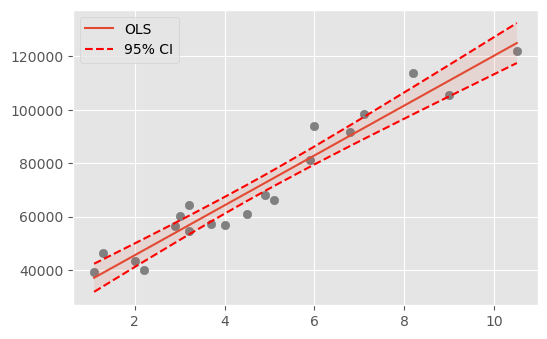

In [55]:
# Gráfico del modelo

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend()